# Brain Tumor Detection

In [1]:
import os
from operator import itemgetter    
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')
import tensorflow as tf
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder, LabelBinarizer
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
from __future__ import print_function
from keras.wrappers.scikit_learn import KerasClassifier
import keras
from keras.datasets import cifar10
import keras.backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras import layers
from PIL import Image
import glob
import tensorflow as tf
import matplotlib.image as img
import os, os.path
from multiprocessing import Pool
%matplotlib inline

In [3]:
seed = 0
np.random.seed(seed)

In [4]:
# For google colab but not for actual computer
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
images = []
filename = []
image_file = []
label_name = []
number_classes = 2
# This is the path if you are doing it in your computer but the data set was to bing and it would take to long to do so
paths = "/home/ronaldson_bellande/Desktop/Healthcare Data Analytics/Disease Analysis/Brain_Tumor/Data/Data/"

# This is the google colab paths
#paths = "/content/drive/My Drive/Colab Notebooks/Data/Data"
valid_images = [".jpg",".png"]
for img in os.listdir(paths):
    ext = os.path.splitext(img)[1]
    if ext.lower() not in valid_images:
        continue
    images.append(Image.open(os.path.join(paths,img)))

In [5]:
for i in range(len(images)):
    print(images[i])

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=228x221 at 0x7F5D7D109AC0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=428x417 at 0x7F5D7D0E56D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=L size=1275x1427 at 0x7F5D7D0E5790>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=630x630 at 0x7F5D7D075100>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=315x350 at 0x7F5D7D075160>
<PIL.JpegImagePlugin.JpegImageFile image mode=L size=911x938 at 0x7F5D7D0751C0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=283x338 at 0x7F5D7D075220>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=250x290 at 0x7F5D7D075280>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=232x217 at 0x7F5D7D075310>
<PIL.PngImagePlugin.PngImageFile image mode=P size=728x725 at 0x7F5D7D0753D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=L size=442x442 at 0x7F5D7D0754C0>
<PIL.JpegImagePlugin.JpegImageFile image mode=L size=1024x1024 at 0x7F5D7D075460>
<PIL.JpegImagePlugin.Jpe

In [6]:
for i in range(len(images)):
    print(i,": ",images[i].format)
    print(i,": ",images[i].mode)
    print(i,": ",images[i].size)

0 :  JPEG
0 :  RGB
0 :  (228, 221)
1 :  JPEG
1 :  RGB
1 :  (428, 417)
2 :  JPEG
2 :  L
2 :  (1275, 1427)
3 :  JPEG
3 :  RGB
3 :  (630, 630)
4 :  JPEG
4 :  RGB
4 :  (315, 350)
5 :  JPEG
5 :  L
5 :  (911, 938)
6 :  JPEG
6 :  RGB
6 :  (283, 338)
7 :  JPEG
7 :  RGB
7 :  (250, 290)
8 :  JPEG
8 :  RGB
8 :  (232, 217)
9 :  PNG
9 :  P
9 :  (728, 725)
10 :  JPEG
10 :  L
10 :  (442, 442)
11 :  JPEG
11 :  L
11 :  (1024, 1024)
12 :  JPEG
12 :  RGB
12 :  (200, 253)
13 :  JPEG
13 :  L
13 :  (289, 300)
14 :  JPEG
14 :  RGB
14 :  (270, 316)
15 :  JPEG
15 :  RGB
15 :  (450, 446)
16 :  JPEG
16 :  RGB
16 :  (232, 217)
17 :  JPEG
17 :  RGB
17 :  (278, 324)
18 :  JPEG
18 :  RGB
18 :  (630, 630)
19 :  JPEG
19 :  RGB
19 :  (504, 630)
20 :  JPEG
20 :  RGB
20 :  (194, 259)
21 :  JPEG
21 :  RGB
21 :  (196, 257)
22 :  JPEG
22 :  RGB
22 :  (300, 168)
23 :  PNG
23 :  RGBA
23 :  (512, 512)
24 :  JPEG
24 :  RGB
24 :  (288, 340)
25 :  JPEG
25 :  RGB
25 :  (311, 355)
26 :  JPEG
26 :  RGB
26 :  (200, 210)
27 :  JPEG
27

In [11]:
# This is the path if you are doing it on your own computer
path = "/home/ronaldson_bellande/Desktop/Healthcare Data Analytics/Disease Analysis/Brain_Tumor/Data/Data/1 no.jpeg"

# This is the path if your doing it on colab
#path = "/content/drive/My Drive/Colab Notebooks/Data/Data/1 no.jpeg"

In [12]:
image  = cv2.imread(path, 0)

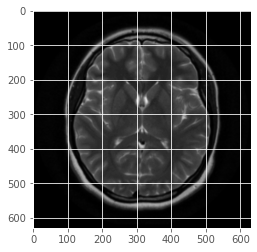

In [13]:
plt.imshow(image, cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [14]:
# Resize the image to have a dimention of 240 by 240
image = cv2.resize(image,(240,240))

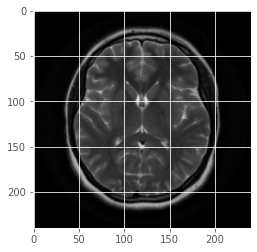

In [15]:
plt.imshow(image,cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [16]:
# Label and Standardizing
# Loading files from directory
for imagename in os.listdir(paths):
    filename.append(imagename)
    
    # Reading images using CV2
    image = cv2.imread(os.path.join(paths,imagename))
    image = cv2.resize(image,(240,240), interpolation = cv2.INTER_AREA)
    image_file.append(image)

In [17]:
    # Label images
    if 'y' in imagename.lower():
        label_name.append(1)
    elif 'n' in imagename.lower():
        label_name.append(0)

In [18]:
image_file = np.array(image_file)
print(image_file)

[[[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  ...

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0

In [19]:
label_name = np.array(label_name)
label_name.resize((len(image_file),1))
print(label_name)

[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


In [20]:
#Splitting the Training Data and the Test Data
X_train, X_test, Y_train_vec, Y_test_vec = train_test_split(image_file, label_name, test_size = 0.20, random_state = 0)

In [21]:
input_shape = X_train.shape[1:]
print(input_shape)

(240, 240, 3)


In [22]:
print('x_train shape:', X_train.shape)
print('y_train shape:', Y_train_vec.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (202, 240, 240, 3)
y_train shape: (202, 1)
202 train samples
51 test samples


In [23]:
# Convert vectors to binary for Y_axis
Y_train = keras.utils.to_categorical(Y_train_vec,number_classes)
Y_test = keras.utils.to_categorical(Y_test_vec,number_classes)

In [24]:
# Turning it into float
print(X_train)
X_train = X_train.astype("float32")
X_train /= 255
print(X_train)
print(X_test)
X_test = X_test.astype("float32")
X_test /= 255
print(X_test)

[[[[ 1  1  1]
   [ 1  1  1]
   [ 1  1  1]
   ...
   [ 1  1  1]
   [ 1  1  1]
   [ 1  1  1]]

  [[ 1  1  1]
   [ 1  1  1]
   [ 1  1  1]
   ...
   [ 1  1  1]
   [ 1  1  1]
   [ 1  1  1]]

  [[ 1  1  1]
   [ 1  1  1]
   [ 1  1  1]
   ...
   [ 1  1  1]
   [ 1  1  1]
   [ 1  1  1]]

  ...

  [[ 1  1  1]
   [ 1  1  1]
   [ 1  1  1]
   ...
   [ 1  1  1]
   [ 1  1  1]
   [ 1  1  1]]

  [[ 1  1  1]
   [ 1  1  1]
   [ 1  1  1]
   ...
   [ 1  1  1]
   [ 1  1  1]
   [ 1  1  1]]

  [[ 1  1  1]
   [ 1  1  1]
   [ 1  1  1]
   ...
   [ 1  1  1]
   [ 1  1  1]
   [ 1  1  1]]]


 [[[10 10 10]
   [10 10 10]
   [10 10 10]
   ...
   [10 10 10]
   [10 10 10]
   [10 10 10]]

  [[10 10 10]
   [10 10 10]
   [10 10 10]
   ...
   [10 10 10]
   [10 10 10]
   [10 10 10]]

  [[10 10 10]
   [10 10 10]
   [10 10 10]
   ...
   [10 10 10]
   [10 10 10]
   [10 10 10]]

  ...

  [[10 10 10]
   [10 10 10]
   [10 10 10]
   ...
   [10 10 10]
   [10 10 10]
   [10 10 10]]

  [[10 10 10]
   [10 10 10]
   [10 10 10]
   ...
   [1

In [25]:
# Create CNN
def ConvNeuralNetwork():
    model = Sequential()
    # First Hitten Layer with 64, 7, 7
    model.add(Conv2D(64,(7,7), strides = (1,1), padding="same", input_shape = input_shape, activation = "relu"))
    model.add(MaxPooling2D(pool_size = (4,4)))
    model.add(Dropout(0.25))
    
    # Second Hitten Layer 32, 7, 7
    model.add(Conv2D(32,(7,7), strides = (1,1), padding="same", activation = "relu"))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.25))
    
    # # Second Hitten Layer 32, 7, 7
    # model.add(Conv2D(16,(7,7), strides = (1,1), padding="same", activation = "relu"))
    # model.add(MaxPooling2D(pool_size = (1,1)))
    # model.add(Dropout(0.25))
    
    # last layer, output Layer
    model.add(Flatten())
    model.add(Dense(units = number_classes, activation = 'softmax'))

    
    model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    print(model.summary())
    
    return model

In [26]:
model = KerasClassifier(build_fn = ConvNeuralNetwork, verbose = 0)

In [27]:
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size = batch_size, epochs = epochs)
grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = 1, cv = 3, verbose = 10)

In [28]:
# Reshaped X_axis for train and test to be [samples, time steps, features]
print("Before: ", X_train.shape)
print("Before: ",X_test.shape)
#X_train = X_train.reshape(-1,192,240,1).astype("float32")
#X_test = X_test.reshape(-1,48,240,1).astype("float32")
#X_train = X_train.shape[1:]
#print("After: ",X_train.shape)
#print("After: ",X_test.shape)
#print("Y_train: ",Y_train.shape)
#print("Y_test: ",Y_test.shape)

Before:  (202, 240, 240, 3)
Before:  (51, 240, 240, 3)


In [ ]:
# Grid Results
# Use TPU or GPU from google colab to do all this 
# tf.keras.backend.clear_session()

# resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
# tf.config.experimental_connect_to_cluster(resolver)
# # This is the TPU initialization code that has to be at the beginning.
# tf.tpu.experimental.initialize_tpu_system(resolver)
# strategy = tf.distribute.experimental.TPUStrategy(resolver)

#with tf.device('/device:GPU:0'):
grid_results = grid.fit(X_train, Y_train)

In [34]:
model = ConvNeuralNetwork()
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

Model: "sequential_110"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_220 (Conv2D)          (None, 240, 240, 64)      9472      
_________________________________________________________________
max_pooling2d_220 (MaxPoolin (None, 60, 60, 64)        0         
_________________________________________________________________
dropout_220 (Dropout)        (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_221 (Conv2D)          (None, 60, 60, 32)        100384    
_________________________________________________________________
max_pooling2d_221 (MaxPoolin (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_221 (Dropout)        (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_110 (Flatten)        (None, 28800)          

In [36]:
early = keras.callbacks.EarlyStopping(monitor='val_acc', patience=4, verbose=1)

batch_size = 40 
epochs = 100

brain_cancer_model = model.fit(X_train, Y_train,
          batch_size=batch_size,
          validation_split=0.15,
          epochs=epochs,
          callbacks=[early],
          shuffle=True)

Epoch 1/100
5/5 [==============================] - 1s 143ms/step - loss: 0.1546 - accuracy: 0.9298 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/100
5/5 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/100
5/5 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/100
5/5 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/100
5/5 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/100
5/5 [==============================] - 0s 61ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0

In [37]:
evaluation = model.evaluate(X_test, Y_test, verbose=1)
print("Loss:", evaluation[0])
print("Accuracy: ", evaluation[1])

2/2 [==============================] - 0s 59ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Loss: 0.0
Accuracy:  1.0


In [ ]:
def plot_model(brain_cancer_model):
  plt.plot(model_details.history['accuracy'])
  plt.plot(model_details.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'Validation'], loc='upper left')
  plt.show()
  plt.plot(model_details.history['loss'])
  plt.plot(model_details.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'Validation'], loc='upper left')
  plt.show()

In [ ]:
plot_model(brain_cancer_model)